In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

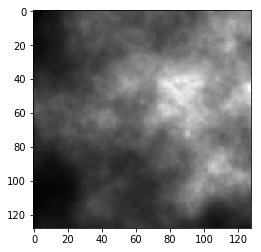

In [2]:
DATADIR = "D:/DATA/ExponentiatedNonPeriodicNoisy/features"

for img in os.listdir(DATADIR):
    img_array = np.loadtxt(os.path.join(DATADIR,img))
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break

In [3]:
print(img_array)

[[0.01217256 0.0115296  0.01658914 ... 0.55794967 0.53248142 0.53307388]
 [0.01182183 0.00972015 0.00997183 ... 0.56168985 0.55625791 0.53726443]
 [0.01397698 0.01560336 0.01938385 ... 0.55476522 0.55934719 0.51614366]
 ...
 [0.04046994 0.05274697 0.06026602 ... 0.11502642 0.11815295 0.12921414]
 [0.04272222 0.05355349 0.06145802 ... 0.10083991 0.10540152 0.11954614]
 [0.0466161  0.05194281 0.05997957 ... 0.08277072 0.09774885 0.1109386 ]]


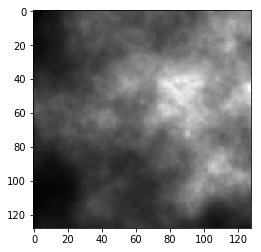

In [4]:
IMG_SIZE = 128

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
labels = np.loadtxt("D:/DATA/ExponentiatedNonPeriodicNoisy/labels/labels.txt")
print(labels)

[[8.42641525e-01 1.37347087e+00 9.71695366e-03]
 [9.41450826e-02 1.47368505e+00 4.52360768e-04]
 [5.93459162e-01 2.87760252e+00 1.79909497e-03]
 ...
 [2.69486037e-01 2.59535181e+00 8.19609850e-03]
 [4.39130031e-01 2.35258894e+00 7.23381476e-03]
 [4.24091707e-01 2.29812670e+00 6.70219044e-03]]


In [6]:
training_data = []

def create_training_data():
    c=0
    for img in tqdm(os.listdir(DATADIR)):
        try:
            img_array = np.loadtxt(os.path.join(DATADIR,img))
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,labels[c]])
            c+=1
        except Exception as e:
            pass

create_training_data()
print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 40000/40000 [23:07<00:00, 28.83it/s]


40000


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

[7.73287454e-01 2.34794739e+00 1.37274636e-03]
[0.51036361 2.32815465 0.00878669]
[0.78694444 2.94504588 0.00893639]
[0.59933362 1.51597373 0.00965307]
[0.83296845 2.5774859  0.00710467]
[0.46935351 0.08811687 0.00570636]
[0.49283388 0.52292196 0.00665643]
[0.50906388 1.4796172  0.00927153]
[0.07493448 0.85121948 0.00807503]
[4.72718572e-01 2.51681962e+00 2.12118666e-03]


In [9]:
X = []
H = []
sigma = []
noise = []
y=[]

for features,label in training_data:
    X.append(features)
    H.append(label[0])
    sigma.append(label[1])
    noise.append(label[2])
    
y = [H,sigma, noise]
    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

print(y)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[0.00404232]
   [0.00402094]
   [0.00406189]
   ...
   [0.07065388]
   [0.0764967 ]
   [0.09241889]]

  [[0.00421519]
   [0.0040941 ]
   [0.00327318]
   ...
   [0.07710472]
   [0.08725863]
   [0.10288343]]

  [[0.00353208]
   [0.00346569]
   [0.0029028 ]
   ...
   [0.0907074 ]
   [0.09697153]
   [0.11433915]]

  ...

  [[0.56213344]
   [0.5745277 ]
   [0.61372924]
   ...
   [0.04394499]
   [0.04386177]
   [0.04043915]]

  [[0.55790379]
   [0.61389928]
   [0.60648391]
   ...
   [0.04542153]
   [0.04121674]
   [0.03820738]]

  [[0.65043766]
   [0.60814488]
   [0.59039754]
   ...
   [0.04801965]
   [0.04301228]
   [0.03528167]]]]


[[0.7732874541495326, 0.5103636082573055, 0.7869444406543574, 0.5993336212319483, 0.8329684494388158, 0.46935350530571307, 0.492833883537513, 0.5090638841497804, 0.07493447763225325, 0.47271857230424064, 0.5572789922987891, 0.1803928290004796, 0.9238090532527309, 0.24967579385887373, 0.41176023693246955, 0.2795007153867106, 0.7423315103362416, 0.030201963375330654, 0.6129590411720844, 0.4875068934351994, 0.6256469071908543, 0.6192185491147758, 0.45556730884816, 0.11297695821133213, 0.07802050900533808, 0.4597803071610883, 0.8060338545358006, 0.973692558540204, 0.5246223327158143, 0.06583180332636085, 0.8619469267066205, 0.35160850586347825, 0.10756582546635862, 0.5296395711843478, 0.0020626587008155672, 0.2152030669394065, 0.7403403146377957, 0.3664049649674629, 0.3395534284701551, 0.2810559693678323, 0.7730443399750819, 0.19188864094431102, 0.10116255693215925, 0.8864780803804113, 0.6472768848711872, 0.8044607899862659, 0.5272063841370125, 0.8095059798673124, 0.6866855475077382, 0.685

In [10]:
import pickle

pickle_out = open("D:/DATA/ExponentiatedNonPeriodicNoisy/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("D:/DATA/ExponentiatedNonPeriodicNoisy/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

OverflowError: cannot serialize a bytes object larger than 4 GiB

In [ ]:
print(training_data[1999])